In [5]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os

print(os.listdir('/content/drive/MyDrive/Exercicios/Imagens para deteccao celebridades/train'))

['9_Megan (42).jpg', '9_Megan (37).jpg', '9_Megan (33).jpg', '9_Megan (36).jpg', '9_Megan (35).jpg', '9_Megan (39).jpg', '9_Megan (38).jpg', '9_Megan (34).jpg', '9_Megan (32).jpg', '9_Megan (100).jpg', '9_Megan (85).jpg', '9_Megan (87).jpg', '9_Megan (83).jpg', '9_Megan (84).jpg', '9_Megan (86).jpg', '9_Megan (88).jpg', '9_Megan (82).jpg', '9_Megan (81).jpg', '9_Megan (80).jpg', '9_Megan (79).jpg', '9_Megan (74).jpg', '9_Megan (73).jpg', '9_Megan (75).jpg', '9_Megan (78).jpg', '9_Megan (76).jpg', '9_Megan (71).jpg', '9_Megan (70).jpg', '9_Megan (77).jpg', '9_Megan (72).jpg', '9_Megan (69).jpg', '9_Megan (67).jpg', '9_Megan (63).jpg', '9_Megan (61).jpg', '9_Megan (60).jpg', '9_Megan (66).jpg', '9_Megan (68).jpg', '9_Megan (65).jpg', '9_Megan (64).jpg', '9_Megan (59).jpg', '9_Megan (62).jpg', '9_Megan (56).jpg', '9_Megan (53).jpg', '9_Megan (57).jpg', '9_Megan (54).jpg', '9_Megan (55).jpg', '9_Megan (58).jpg', '9_Megan (50).jpg', '9_Megan (52).jpg', '9_Megan (51).jpg', '9_Megan (49).jpg'

In [15]:
def caminho ():

  paths = [os.path.join('/content/drive/MyDrive/Exercicios/Imagens para deteccao celebridades/train', f) for f in os.listdir('/content/drive/MyDrive/Exercicios/Imagens para deteccao celebridades/train')]
  faces = []
  ids = []

  for path in paths:

    imagem = Image.open(path).convert('L')
    imagem_np = np.array(imagem, 'uint8')

    id = int(os.path.split(path)[1].split('_')[0])
    print (id)
    ids.append(id)
    faces.append(imagem_np)


  return np.array(ids), faces

In [ ]:
ids, faces = caminho()

In [17]:
ids

array([9, 9, 9, ..., 4, 4, 4])

In [18]:
faces

[array([[241, 240, 237, ..., 215, 220, 220],
        [240, 239, 236, ..., 214, 220, 220],
        [240, 237, 234, ..., 214, 215, 215],
        ...,
        [196, 201, 192, ..., 164, 173, 165],
        [194, 201, 197, ..., 176, 184, 177],
        [202, 203, 196, ..., 175, 182, 175]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[ 20,  17,  16, ...,   6,   6,   6],
        [ 20,  17,  16, ...,   6,   6,   6],
        [ 21,  18,  17, ...,   6,   6,   6],
        ...,
        [100, 100, 102, ...,   0,   0,   0],
        [110, 104, 101, ...,   0,   1,  62],
        [110, 104, 101, ...,   0,   1,  62]], dtype=uint8),
 array([[255, 255, 252, ..., 249, 255, 255],
        [255, 254, 251, ..., 245, 254, 254],
        [255, 25

In [20]:
lbph_classificador = cv2.face.LBPHFaceRecognizer_create()
lbph_classificador.train(faces,ids)
lbph_classificador.write('classificador_das_faces.yml')


In [21]:
lbph_classificador_face = cv2.face.LBPHFaceRecognizer_create()
lbph_classificador_face.read('/content/classificador_das_faces.yml')

In [22]:
paths = [os.path.join('/content/drive/MyDrive/Exercicios/Imagens para deteccao celebridades/train', f) for f in os.listdir('/content/drive/MyDrive/Exercicios/Imagens para deteccao celebridades/train')]

previsoes = []
saidas_esperadas = []

for path in paths:

  imagem = Image.open(path).convert('L')
  imagem_np = np.array(imagem, 'uint8')
  previsao, _ = lbph_classificador_face.predict(imagem_np)
  saida_esperada = int(os.path.split(path)[1].split('_')[0])

  previsoes.append(previsao)
  saidas_esperadas.append(saida_esperada)

previsoes = np.array(previsoes)
saidas_esperadas= np.array(saidas_esperadas)


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(saidas_esperadas, previsoes)

1.0

In [25]:
matriz = confusion_matrix(saidas_esperadas, previsoes)
matriz

array([[ 70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,  70,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  70,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  70,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  70,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  70,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  70,   0,   0,   0,
         

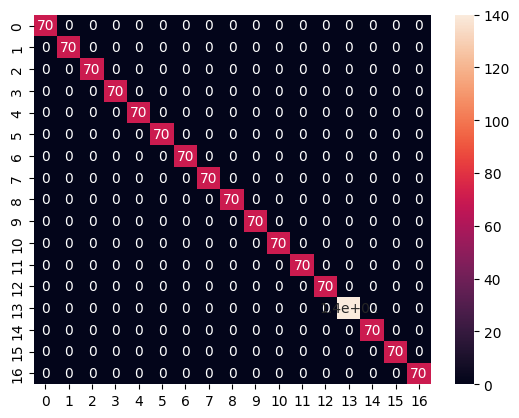

In [27]:
import seaborn

seaborn.heatmap(matriz, annot= True);